<a href="https://colab.research.google.com/github/Azariagmt/data-science-notebooks/blob/master/seaborn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

code along to Derek Banas's amazing [seaborn youtube tutorial](https://www.youtube.com/watch?v=6GUZXDef2U0) 

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [64]:
df = sns.load_dataset('car_crashes')
df.head()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA


## Distribution plot(histogram)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


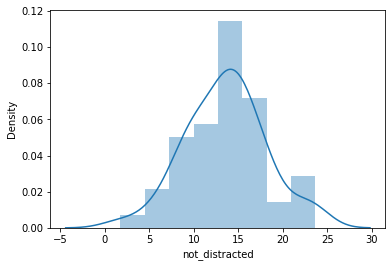

In [8]:
sns.distplot(df['not_distracted'], bins=8)

## Joint plot

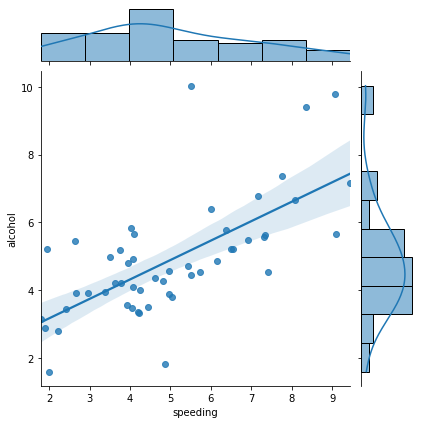

In [14]:
sns.jointplot(x="speeding", y="alcohol", data=df, kind="reg")

## KDE plots

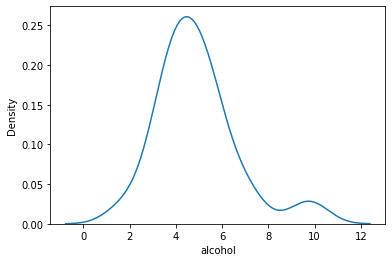

In [16]:
sns.kdeplot(df['alcohol'])

## Pairplots
pairplots show entire relation information of our data

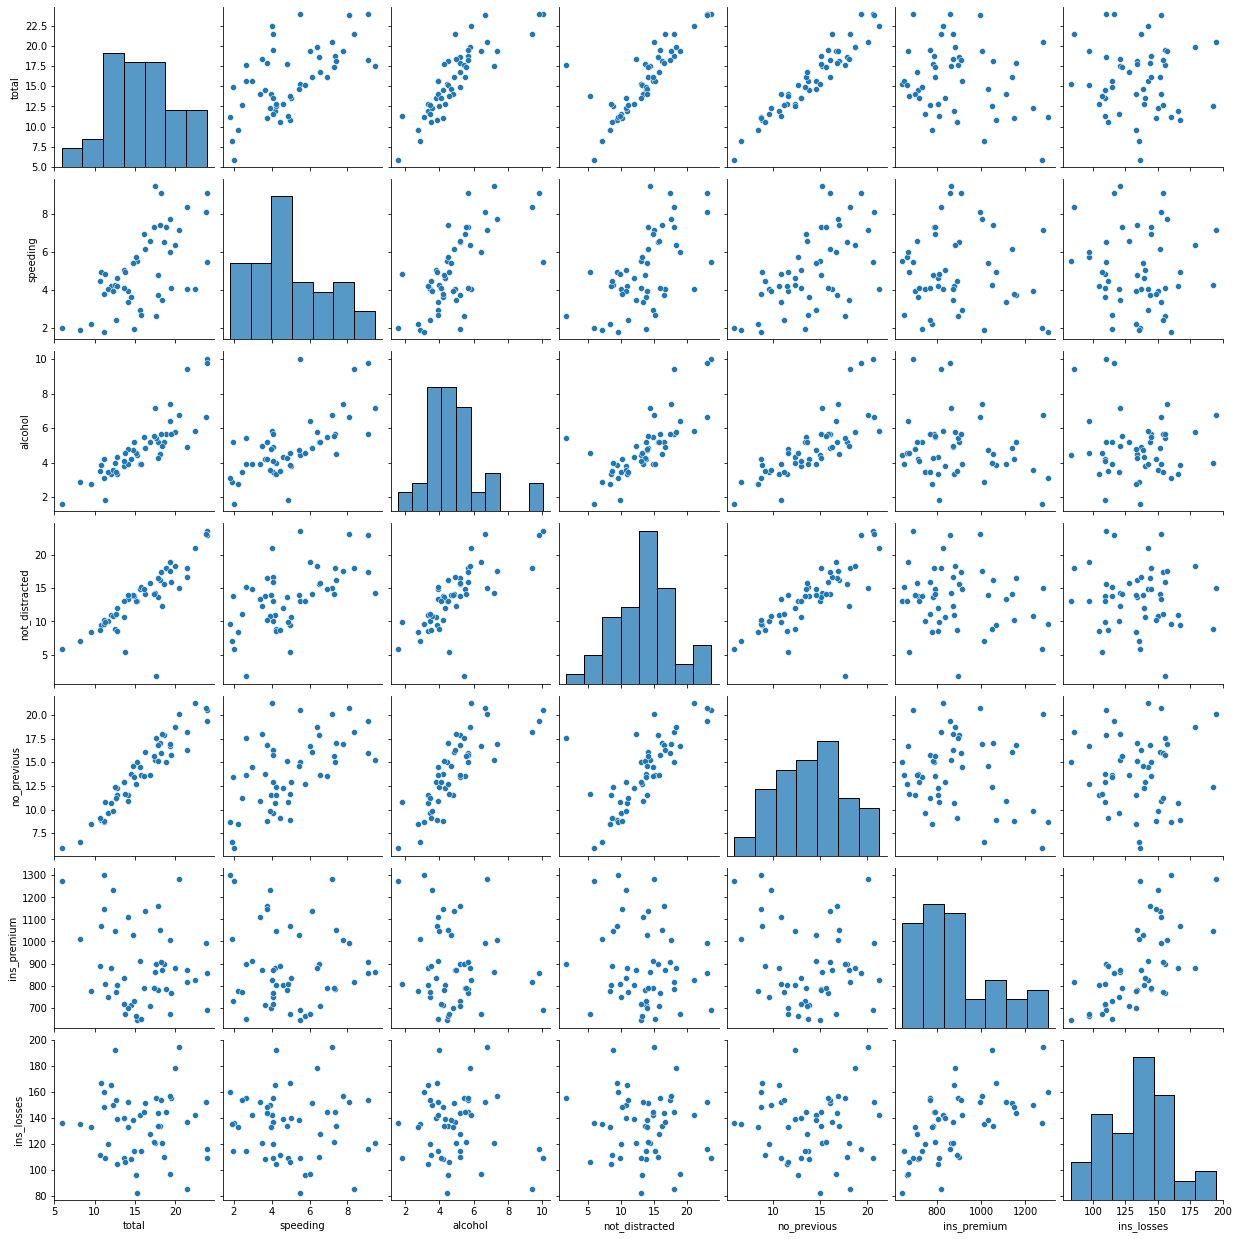

In [17]:
sns.pairplot(df)

## Rugplot
dense amount of lines where value is most common

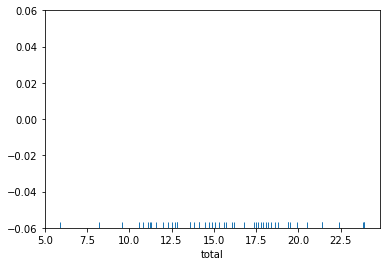

In [21]:
sns.rugplot(df['alcohol'])

## Styling

<Figure size 576x288 with 0 Axes>

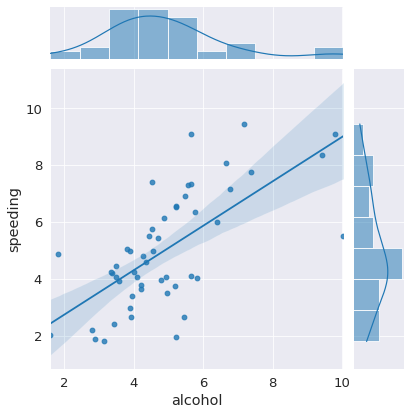

In [26]:
sns.set_style('darkgrid')

plt.figure(figsize=(8,4))
sns.set_context('paper',font_scale=1.5)
sns.jointplot(x='alcohol', y="speeding", data=df, kind="reg")

# Categorical plotting

In [48]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'tips',
 'titanic']

In [49]:
tips_df = sns.load_dataset('tips')

In [50]:
tips_df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## Bar plots

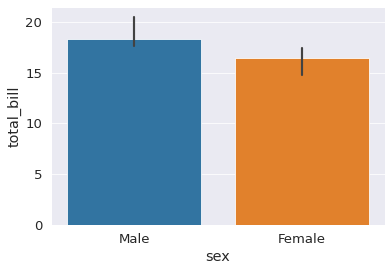

In [33]:
sns.barplot(x=tips_df['sex'], y=tips_df['total_bill'], estimator=np.median)

## Count plot

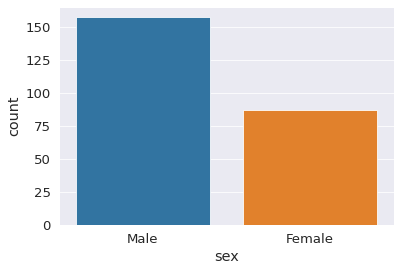

In [34]:
sns.countplot(x='sex', data=tips_df)

## Box plots

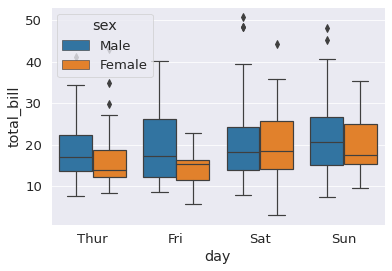

In [37]:
sns.boxplot(x='day', y='total_bill', data=tips_df, hue="sex")

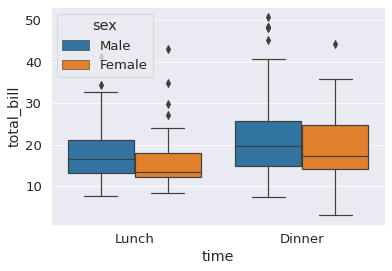

In [39]:
sns.boxplot(x='time', y="total_bill", data=tips_df, hue="sex")

## Violin plot

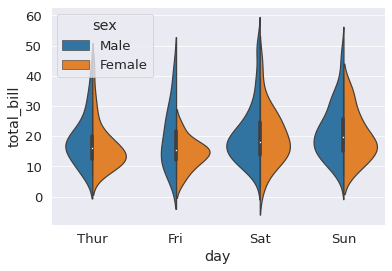

In [42]:
sns.violinplot(x='day', y='total_bill', data=tips_df, hue='sex', split=True)

## Strip plot

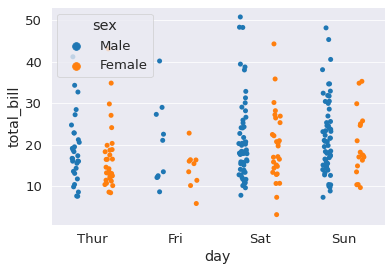

In [45]:
sns.stripplot(x='day', y='total_bill', data=tips_df, hue='sex', dodge=True)

## Swarmplot

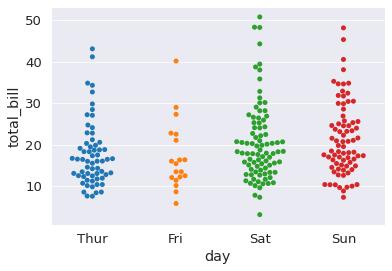

In [47]:
sns.swarmplot(x='day', y='total_bill', data=tips_df)

## Palettes 

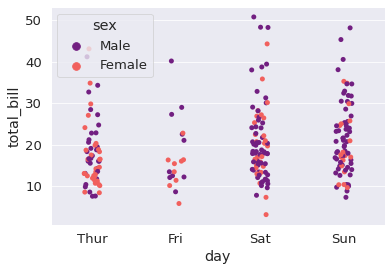

In [55]:
sns.stripplot(x='day', y='total_bill', data=tips_df, palette='magma', hue="sex")
# to get access to all palettes available go to matplotlib colormaps

## Legends

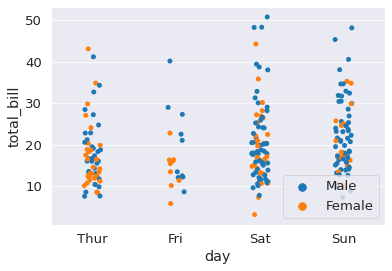

In [63]:
sns.stripplot(x='day', y='total_bill', data=tips_df, hue="sex")
plt.legend(loc=4)
# best = 0 | upper right = 1 | upper left = 2 | lower left =3 | lower right = 4
# matplotlib.pyplot.legend

# Matrix plots

## Heatmaps

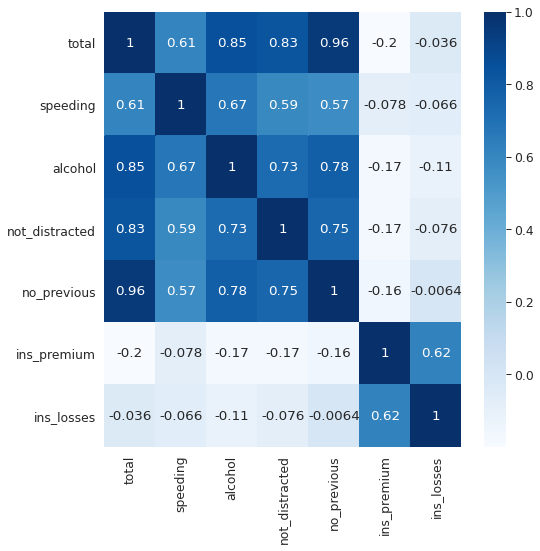

In [68]:
plt.figure(figsize=(8,8))
sns.set_context(context="paper", font_scale=1.4)
crash_mx = df.corr()
sns.heatmap(crash_mx, annot=True, cmap="Blues")

In [69]:
flights_df = sns.load_dataset('flights')
flights_df.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [70]:
# creating a pivot table
flights_pivot = flights_df.pivot_table(values="passengers",index="month",columns="year")
flights_pivot

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


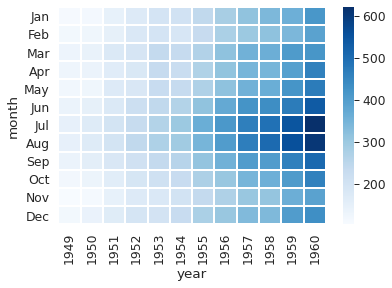

In [71]:
sns.heatmap(flights_pivot, cmap="Blues", linewidths=1)

## Cluster maps

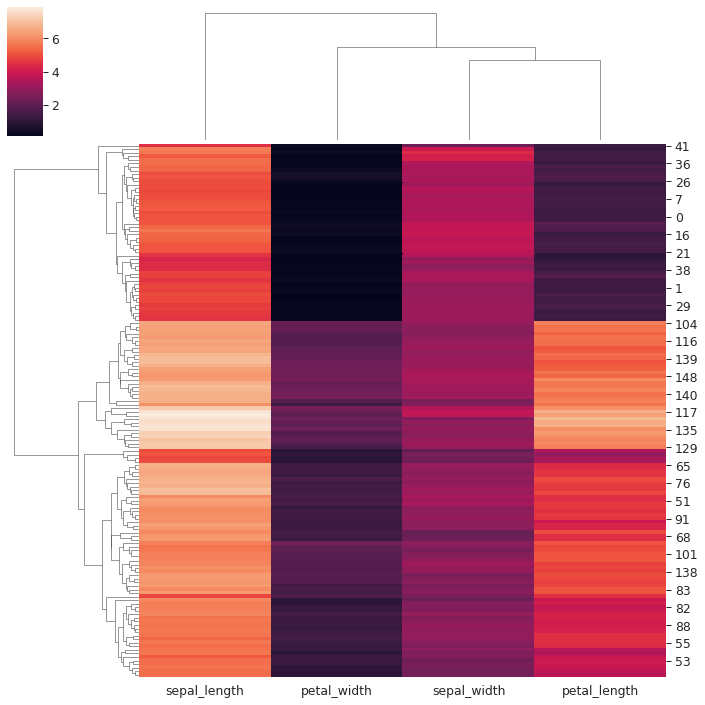

In [73]:
iris_df = sns.load_dataset('iris')
species = iris_df.pop('species')
sns.clustermap(iris_df)

## Pair grids
very specific pair plots

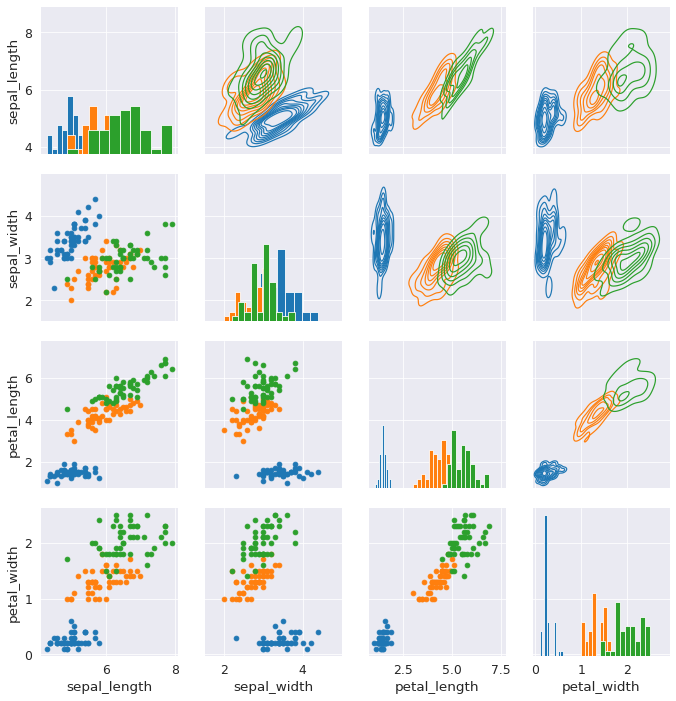

In [79]:
iris_df = sns.load_dataset('iris')
iris_g = sns.PairGrid(iris_df, hue="species")
iris_g.map_diag(plt.hist)
# iris_g.map_offdiag(plt.scatter)
iris_g.map_lower(plt.scatter)
iris_g.map_upper(sns.kdeplot)

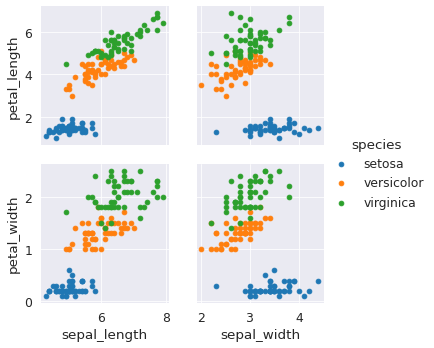

In [85]:
iris_g = sns.PairGrid(iris_df, hue="species", x_vars = ['sepal_length', 'sepal_width'], y_vars=['petal_length', 'petal_width'])
iris_g.map(plt.scatter)
iris_g.add_legend()

## Facet Grids

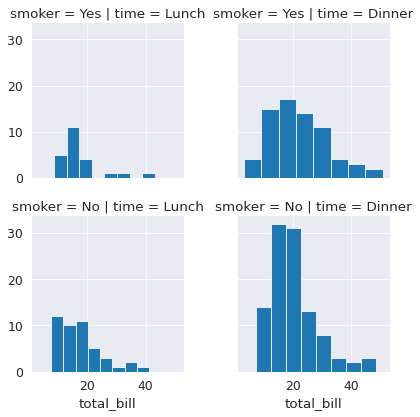

In [88]:
tips_fg = sns.FacetGrid(tips_df, row="smoker", col="time")
tips_fg.map(plt.hist, 'total_bill', bins=8)

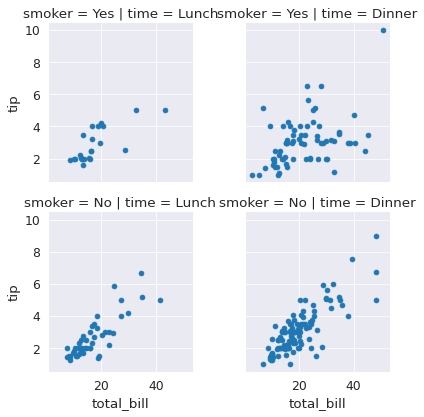

In [89]:
tips_fg = sns.FacetGrid(tips_df, row="smoker", col="time")
tips_fg.map(plt.scatter, 'total_bill', 'tip')

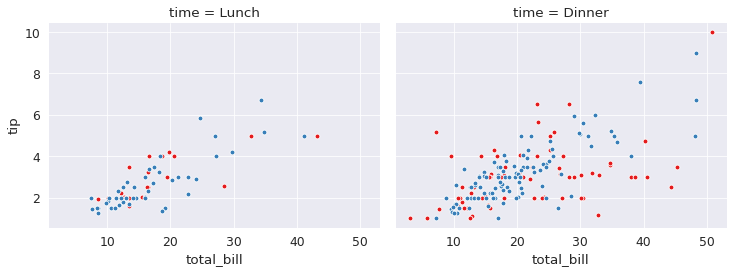

In [93]:
tips_fg = sns.FacetGrid(tips_df, hue="smoker", col="time", height=4, aspect=1.3, palette='Set1')
tips_fg.map(plt.scatter, 'total_bill', 'tip',edgecolor="w")

## Regression plots

In [94]:
tips_df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<Figure size 576x432 with 0 Axes>

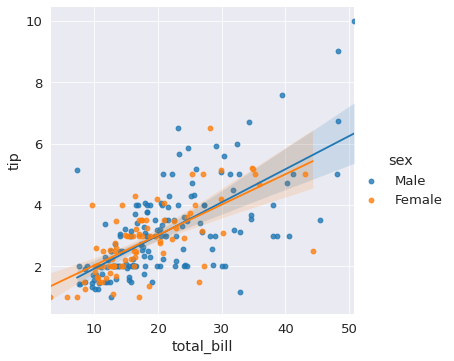

In [95]:
plt.figure(figsize=(8,6))
sns.set_context('paper', font_scale=1.5)
sns.lmplot(x="total_bill", y="tip", hue="sex", data=tips_df)